In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
!pip install pandas

In [3]:
dataset=pd.read_excel('Market_Portfolio.xlsx',index_col="Date")

/Users/liujing/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
dataset

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [5]:
Data=pd.read_excel('Industry_Portfolios.xlsx',index_col='Date')
Data

/Users/liujing/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [6]:
#Create a table showing the intercept and slope coeffiecients for the ten industry portfolios.

In [7]:
alpha_beta_table=pd.DataFrame(columns=['Alpha','Beta'])

In [8]:
alpha_beta_table

,Alpha,Beta


In [9]:
Rf=0.13
dataset['erm']=dataset['Market']-Rf
dataset

,Market,erm
Date,,
200401,2.22,2.09
200402,1.46,1.33
200403,-1.23,-1.36
200404,-1.75,-1.88
200405,1.23,1.10
...,...,...
201308,-2.69,-2.82
201309,3.76,3.63
201310,4.17,4.04


In [10]:
for x in Data.columns:
    slope, intercept, r_value, p_value, std_err=linregress(dataset['erm'], Data[x]-Rf)
    
    row_data = [intercept, slope]
    alpha_beta_table.loc[x] = row_data

In [11]:
alpha_beta_table

,Alpha,Beta
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086
Other,-0.387135,1.207309


In [12]:
alpha_beta_table.loc['market']=[0.000000, 1.000000]
alpha_beta_table

,Alpha,Beta
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.969850
HiTec,-0.064020,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086
Other,-0.387135,1.207309


In [13]:
#Briefly explain the economic significance of the intercept and slope coefficients.

In [14]:
#Security Market Line

In [15]:
mean_monthly_return_industry=Data.mean()
mean_monthly_return_industry

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [16]:
mean_monthly_return_market=dataset.mean()
mean_monthly_return_market

Market    0.748083
erm       0.618083
dtype: float64

In [17]:
mean_monthly_return_industry.loc['market']=mean_monthly_return_market[0]
mean_monthly_return_industry

NoDur     0.902833
Durbl     0.733333
Manuf     1.012833
Enrgy     1.231167
HiTec     0.766250
Telcm     0.881417
Shops     0.916333
Hlth      0.783833
Utils     0.907167
Other     0.489083
market    0.748083
dtype: float64

Text(0, 0.5, 'Returns')

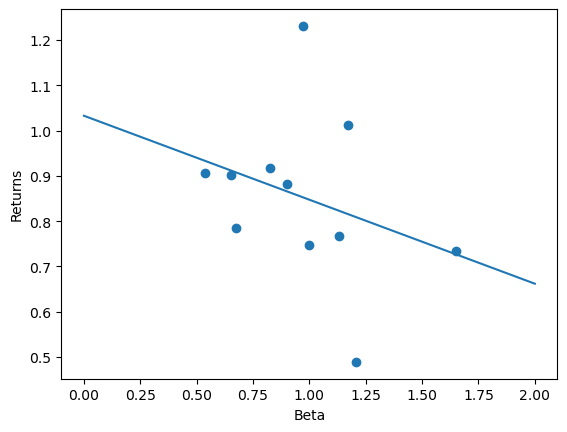

In [21]:
x=alpha_beta_table['Beta']
y=mean_monthly_return_industry
a,b=np.polyfit(x,y,1)
plt.scatter(x,y)
plt.plot([0,2],[b,a*2+b])
plt.xlabel('Beta')
plt.ylabel('Returns')

In [19]:
a

-0.1854674583657328

In [20]:
b

1.0327683682657058

In [ ]:
#Briefly explain the economic significance of the SML.